In [3]:
from google.colab import drive
drive.mount('/content/drive')
###Enlazo a google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [6]:
solicitantes = pd.read_excel("/content/drive/MyDrive/Analitica de los negocios/Nayib Bayes.xlsx", sheet_name=0)
###Determino cual es la base de datos de solicitantes

In [7]:
###Compruebo base de datos
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [8]:
###FORMA DE LA BASE DE DATOS(ITEMS)
solicitantes.shape

(8378, 35)

In [9]:
###FORMA RECORTADA
XD = solicitantes.dropna(subset='PreApr')
XD.shape

(5842, 35)

In [11]:
XD = XD [["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos", "Egresos", "Monto (EAD)", "Plazo", "Cuota (COP)"]]
XD
###AMPLIAMOS A LAS VARIABLES REQUERIDAS(9)

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [12]:
yd = solicitantes["PreApr"].dropna()
yd
###ELIMINO LOS DATOS VACIOS(CELDAS DE DATOS VACIOS)

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [13]:
import numpy as np
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)
print(XDArray)
print(ydArray)

[[3.80000000e+01 1.00000000e+00 0.00000000e+00 ... 2.81503004e+06
  4.80000000e+01 8.26915062e+04]
 [5.10000000e+01 6.00000000e+00 1.00000000e+00 ... 6.30143930e+05
  3.60000000e+01 2.27812126e+04]
 [3.70000000e+01 2.00000000e+00 0.00000000e+00 ... 1.28054021e+06
  3.60000000e+01 4.62945962e+04]
 ...
 [3.80000000e+01 0.00000000e+00 0.00000000e+00 ... 2.67726552e+06
  3.60000000e+01 9.67895621e+04]
 [4.30000000e+01 1.00000000e+00 2.00000000e+00 ... 1.37511242e+06
  3.60000000e+01 4.97136082e+04]
 [3.70000000e+01 1.00000000e+00 2.00000000e+00 ... 4.52536592e+06
  3.60000000e+01 1.63602819e+05]]
[1. 1. 0. ... 1. 1. 1.]


In [15]:
from sklearn.naive_bayes import GaussianNB
###Comienzo a preparar el modelo de aprendizaje Gaussiano

In [16]:
modelNB = GaussianNB()
modelNB.fit(XDArray, ydArray)

GaussianNB()

In [17]:
ydPred = modelNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
cm = confusion_matrix(ydArray, ydPred)
cm
### Esto significa que 420 usuarios y 1041 usuarios son falsos positivos y falsos negativos, por lo que significa que pueden ser 420 pre aprobados que enrealidad no estan siendo bien clasificados . Otro cuadrante de riesgo nos da un total de 1041 que pueden ser 1041 usuarios clasificados como rechazados pero que no lo deberian ser.

array([[2539,  420],
       [1041, 1842]])

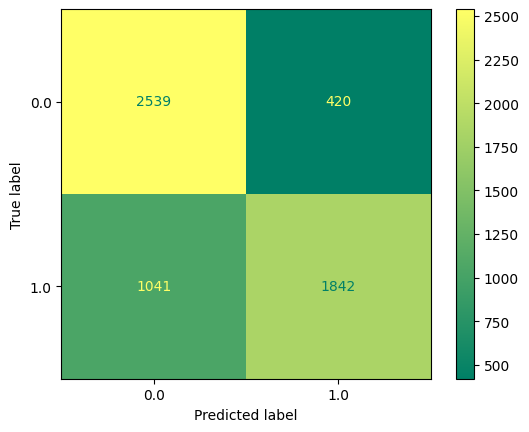

In [21]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelNB.classes_)

disp.plot(cmap="summer")
plt.show()

In [22]:
from re import S

# EValores de la matriz de confusión
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

# Exactitud (Acurracy)
exactitud=(VN+VP)/cm.sum()
print(f"La exactitud (accuracy) del modelo es de {exactitud:.2%}")

# Tasas de error
error = 1-exactitud
print(f"El error del modelo es de {error:.2%}")

# Precisión
presicion = VP/(VP+FP)
print(f"La precisión del modelo es de {presicion:.2%}")

# Sensibilidad
sensibilidad = VP/(VP+FN)
print(f"La sensibilidad del modelo es de {sensibilidad:.2%}")

# Especificidad
especificidad = VN/(VN+FP)
print(f"La especificidad del modelo es de {especificidad:.2%}")

La exactitud (accuracy) del modelo es de 74.99%
El error del modelo es de 25.01%
La precisión del modelo es de 81.43%
La sensibilidad del modelo es de 63.89%
La especificidad del modelo es de 85.81%


In [23]:
XDGener = solicitantes[solicitantes["PreApr"].isna()]

In [25]:
XDGener.shape

(2536, 35)

In [26]:
XDGener = XDGener [["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos", "Egresos", "Monto (EAD)", "Plazo", "Cuota (COP)"]]
XDGener

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04
...,...,...,...,...,...,...,...,...,...
8357,24,1,0,4,2433168,1518301,3.494059e+06,48,1.026380e+05
8358,66,1,0,1,83684,120852,3.822821e+04,24,1.908509e+03
8367,32,0,1,4,1133063,766199,1.013852e+06,36,3.665316e+04
8372,35,2,1,3,3073152,3812690,2.156239e+06,18,1.375805e+05


In [27]:
XDGenerArray = np.array(XDGener, dtype=float)

In [28]:
ydGener = modelNB.predict(XDGenerArray)
ydGener

array([0., 0., 1., ..., 0., 0., 0.])

In [29]:
ydGenerSerie = pd.Series(ydGener, index = solicitantes[solicitantes["PreApr"].isna()].index)
ydGenerSerie

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0
...,...
8357,0.0
8358,0.0
8367,0.0
8372,0.0


In [30]:
solicitantes["PreApr"].fillna(ydGenerSerie, inplace=True)

<ipython-input-30-c1357dc9852b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes["PreApr"].fillna(ydGenerSerie, inplace=True)


In [31]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

ANALISIS DEL MODELO(9) VARIABLES

-El modelo cuenta con un buen funcionamiento y nos permite observar y clasificar a los usuarios como pre aprobados a el credito para el cual piden solicitud.

- Para su exactitud tenemos como resultado que este modelo cuenta con una exactitud del 74,99%. Esto nos indica que el mismo no es muy exacto y tiende a tener una tasa de errores del 25,01%. Si comparamos esto con el modelo anterior nos damos cuenta que a menor cantidad de variables aumenta la exactitud y tambien disminuye el error y se podria decir de forma logica que esto se debe a la cantidad de datos que el modelo debe analizar y que al simplificarse este proceso se le hace mas facil y por ende la clasificacion sera mas exacta y no tendera tanto al error(los % del modelo anterior eran del 76,14% y 23,86% para exactitud y error del modelo de 4 variables respectivamente).
- La precision en el modelo actual mejoro respecto a el modelo anterior (de 81,43% a 81,01%). esto significa que en el modelo se tiene mayor certeza respecto al anterior sobre si el solicitante realmente califica (se denota en la reduccion entre modelos de los falsos positivos)
-La sensibilidad del 63,89% disminuyo comparado a la sensibilidad del modelo anterior. por lo cual rechaza en mayor medida a aquellos que si deberian ser aprobados (lo cual resulta problematico) y aumenta asi falsos negativos.
-En el Modelo actual la especificidad mejoró (85.81%) comparada con la especificidad del Modelo de 4 variables (84.59%), esto significa que el modelo identifica mejor a quienes no deben ser aprobados. En general, es más estricto con la aprobación, pero a costa de rechazar más casos que sí calificaban (Porcentaje de casos negativos detectados)
